In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
x=df.drop(columns=["median_house_value"])
y=df["median_house_value"]

In [ ]:
df.shape

(17000, 9)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(x)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
model=Sequential()
model.add(Dense(15,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                135       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mse'])

In [ ]:
history=model.fit(xtrain,y,epochs=25,batch_size=10)

Epoch 1/25
1700/1700 [==============================] - 3s 2ms/step - loss: 205831.4531 - mse: 55834714112.0000
Epoch 2/25
1700/1700 [==============================] - 3s 2ms/step - loss: 189587.3906 - mse: 49663422464.0000
Epoch 3/25
1700/1700 [==============================] - 3s 2ms/step - loss: 152845.3281 - mse: 37123264512.0000
Epoch 4/25
1700/1700 [==============================] - 3s 2ms/step - loss: 119182.4453 - mse: 25490458624.0000
Epoch 5/25
1700/1700 [==============================] - 3s 2ms/step - loss: 97838.8906 - mse: 17739233280.0000
Epoch 6/25
1700/1700 [==============================] - 3s 2ms/step - loss: 84485.3672 - mse: 13335664640.0000
Epoch 7/25
1700/1700 [==============================] - 3s 2ms/step - loss: 74879.0781 - mse: 10663028736.0000
Epoch 8/25
1700/1700 [==============================] - 3s 2ms/step - loss: 68509.8750 - mse: 9111791616.0000
Epoch 9/25
1700/1700 [==============================] - 3s 2ms/step - loss: 64345.0586 - mse: 8147217408.0000

In [ ]:
history.history

{'loss': [205831.453125,
  189587.390625,
  152845.328125,
  119182.4453125,
  97838.890625,
  84485.3671875,
  74879.078125,
  68509.875,
  64345.05859375,
  61541.109375,
  59477.00390625,
  57830.4921875,
  56429.17578125,
  55182.8671875,
  54068.2890625,
  53085.5625,
  52255.19921875,
  51577.8046875,
  51010.1015625,
  50538.76171875,
  50141.42578125,
  49795.40625,
  49491.68359375,
  49209.8515625,
  48970.30859375],
 'mse': [55834714112.0,
  49663422464.0,
  37123264512.0,
  25490458624.0,
  17739233280.0,
  13335664640.0,
  10663028736.0,
  9111791616.0,
  8147217408.0,
  7526953472.0,
  7080567808.0,
  6693923840.0,
  6411227648.0,
  6123332096.0,
  5913363456.0,
  5704420352.0,
  5545441280.0,
  5428448768.0,
  5323849728.0,
  5241064960.0,
  5170621440.0,
  5112508416.0,
  5058120192.0,
  5006473216.0,
  4977269248.0]}

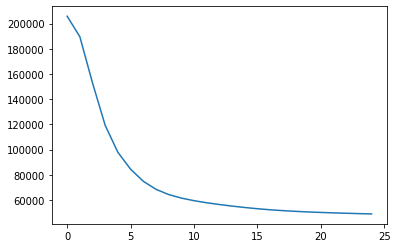

In [ ]:
plt.plot(history.history['loss'])

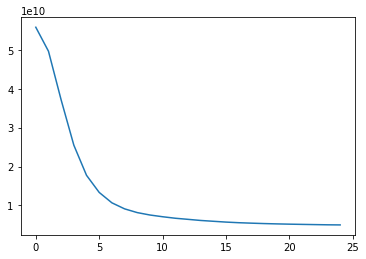

In [ ]:
plt.plot(history.history['mse'])

In [ ]:
model.evaluate(xtrain,y)

532/532 [==============================] - 1s 1ms/step - loss: 48835.3516 - mse: 4960619008.0000


[48835.3515625, 4960619008.0]

In [ ]:
test=pd.read_csv("/content/sample_data/california_housing_test.csv")
test=test.head(50)
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [ ]:
xtest=test.drop(columns=["median_house_value"])
ytest=test["median_house_value"]

In [ ]:
sc_xtest=sc.fit_transform(xtest)

In [ ]:
ypred=model.predict(sc_xtest)
ypred

array([[323488.28 ],
       [193742.83 ],
       [251784.73 ],
       [289744.7  ],
       [ 89664.875],
       [ 58323.94 ],
       [ 82876.29 ],
       [180202.11 ],
       [202305.77 ],
       [103376.47 ],
       [135099.89 ],
       [ 95803.1  ],
       [248877.7  ],
       [195349.64 ],
       [252357.75 ],
       [139698.61 ],
       [ 80342.73 ],
       [101445.75 ],
       [304221.56 ],
       [322407.75 ],
       [217229.33 ],
       [123406.3  ],
       [211664.27 ],
       [191760.89 ],
       [130555.234],
       [315855.38 ],
       [228143.48 ],
       [313551.03 ],
       [143620.7  ],
       [232523.17 ],
       [ 87795.516],
       [158358.33 ],
       [ 90193.484],
       [160166.45 ],
       [238647.05 ],
       [133971.36 ],
       [213913.39 ],
       [253069.47 ],
       [172171.88 ],
       [221832.28 ],
       [ 95914.09 ],
       [279388.1  ],
       [630164.8  ],
       [ 77412.336],
       [232159.56 ],
       [205293.89 ],
       [240234.5  ],
       [16825

In [ ]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred.flatten()})

,Actual,Predicted
0,344700.0,323488.281250
1,176500.0,193742.828125
2,270500.0,251784.734375
3,330000.0,289744.687500
4,81700.0,89664.875000
5,67000.0,58323.941406
6,67000.0,82876.289062
7,166900.0,180202.109375
8,194400.0,202305.765625
9,164200.0,103376.468750
